# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Exploratory Data Analysis

In [ ]:
data = pd.read_csv('beer-servings.csv', index_col=False)

In [ ]:
data.shape

(193, 7)

In [ ]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [ ]:
data = data.iloc[:, 1:]

In [ ]:
data.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe


# Data Cleaning/Preprocessing

## Duplicate Row Removal

In [ ]:
data.duplicated().sum()

0

## Check Missing values

In [ ]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


## Splitting Numerical and Categorical Columns

In [ ]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

## Check histogram of Numerical features for data imputation

['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


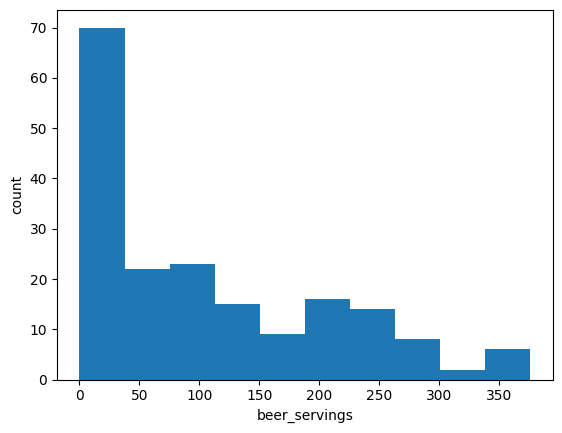

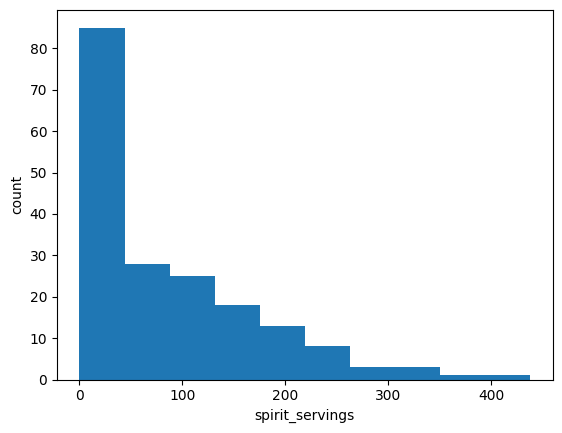

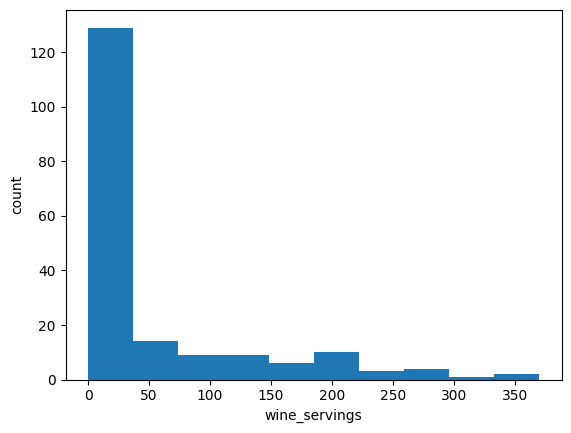

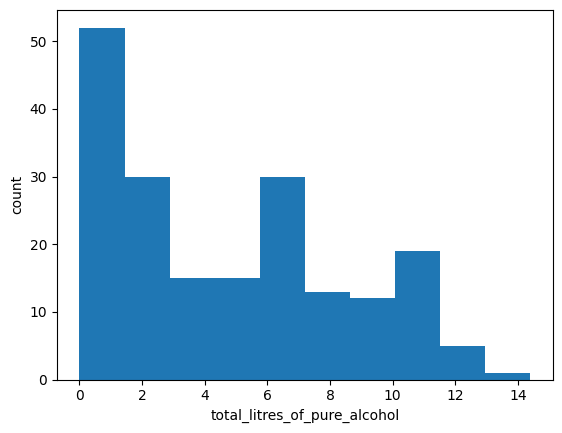

In [ ]:
num_cols = num_df.columns.tolist()
print(num_cols)
for col in num_cols:
  plt.hist(num_df[col])
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [ ]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [ ]:
num_df.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


## Outlier Handling

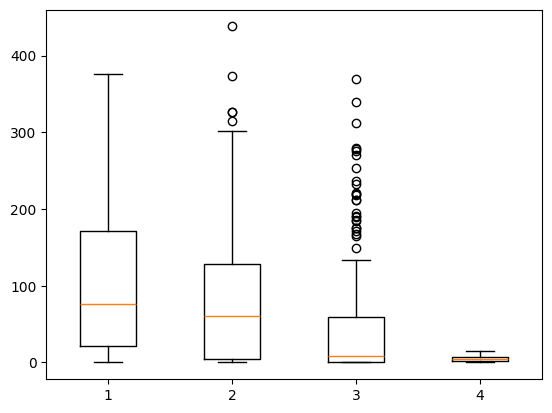

In [ ]:
plt.boxplot(num_df)
plt.show()

In [ ]:
def replace_outliers_with_upper_bound(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [ ]:
for col in num_cols:
  num_df[col] = replace_outliers_with_upper_bound(num_df, col)

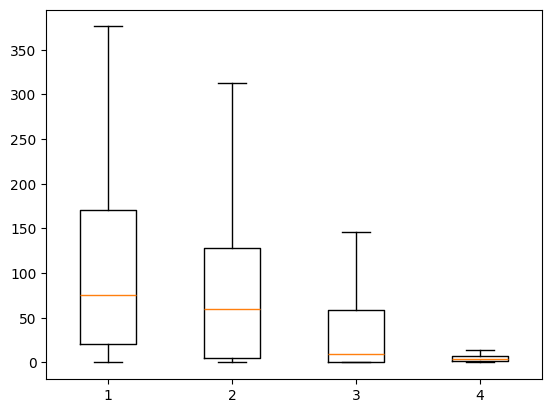

In [ ]:
plt.boxplot(num_df)
plt.show()

## Data Normalization

In [ ]:
num_df.head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9


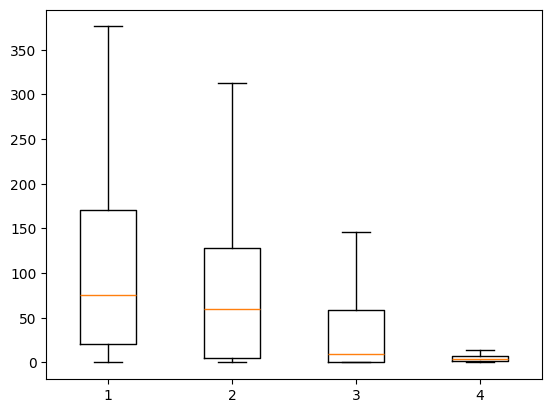

In [ ]:
plt.boxplot(num_df)
plt.show()

In [ ]:
for col in num_cols[:-1]:
  num_df[col] = (num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())

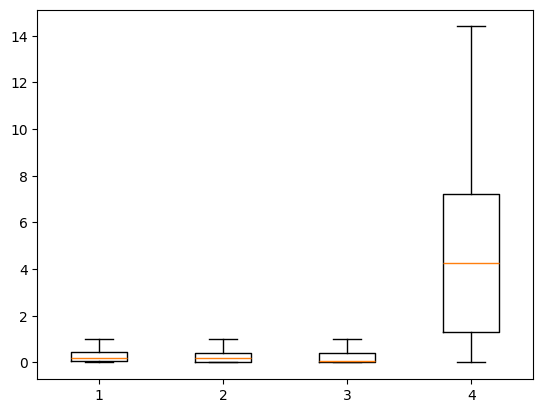

In [ ]:
plt.boxplot(num_df)
plt.show()

## Encoding of Categorical Variables

In [ ]:
cat_df.head(2)

,country,continent
0,Afghanistan,Asia
1,Albania,Europe


In [ ]:
cat_cols = cat_df.columns.tolist()

In [ ]:
for col in cat_cols:
  print(cat_df[col].value_counts())

country
Afghanistan    1
Libya          1
Niger          1
Nigeria        1
Niue           1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64
continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
  encoder = LabelEncoder()
  cat_df[col] = encoder.fit_transform(cat_df[col])

In [ ]:
# import pickle
# with open("label_encoder.pkl", "wb") as f:
#     pickle.dump(encoder, f)

In [ ]:
final_df = pd.concat([num_df, cat_df], axis=1)

In [ ]:
# final_df.head()

# Separate Features and Labels

In [ ]:
y = final_df["total_litres_of_pure_alcohol"]
X = final_df.drop("total_litres_of_pure_alcohol", axis=1)

# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

In [ ]:
reg_lin.coef_

# Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.8443413573692073
R-squared: 0.851490317422722


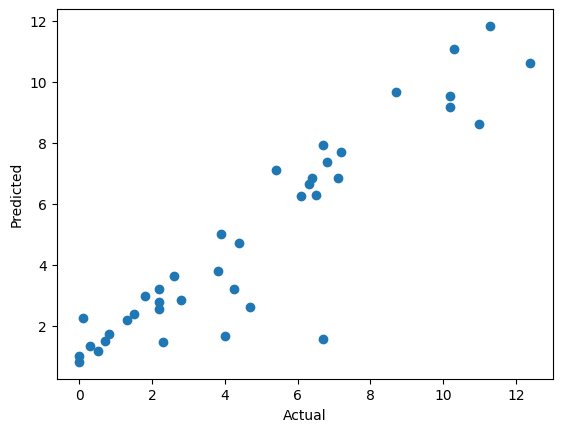

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
auto_data = pd.read_csv('auto-mpg.csv', index_col=False)

In [ ]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
y = auto_data["mpg"]
X = auto_data[["cylinders", "displacement", "weight", "acceleration"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 score:", r2)

Mean Squared Error: 19.40005530820087
R2 score: 0.6975420760318356


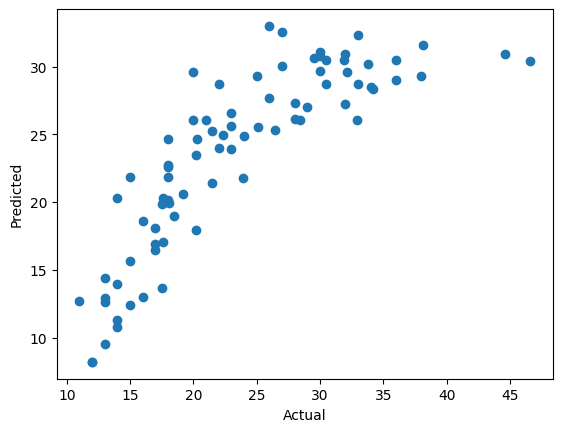

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
from prettytable import PrettyTable

myTable = PrettyTable(["Model", "Metric", "Value"])
myTable.add_row(["Linear Regression", "MSE", mse])
myTable.add_row(["Linear Regression", "MSE", r2])
print(myTable)

+-------------------+--------+--------------------+
|       Model       | Metric |       Value        |
+-------------------+--------+--------------------+
| Linear Regression |  MSE   | 19.40005530820087  |
| Linear Regression |  MSE   | 0.6975420760318356 |
+-------------------+--------+--------------------+


In [ ]:
result_df = pd.DataFrame(columns=["Model", "Metric", "Value"])
result_df.loc[len(result_df)] = ["Linear Regression", "MSE", mse]
result_df.loc[len(result_df)] = ["Linear Regression", "R2", r2]
result_df

,Model,Metric,Value
0,Linear Regression,MSE,19.400055
1,Linear Regression,R2,0.697542
